In [24]:
%matplotlib inline
from FlowCytometryTools import FCMeasurement
import matplotlib.pyplot as plt
import pandas
import numpy
from IPython.core.display import HTML
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

In [25]:
sampleids = {1: 'wt_rich_tmp_1',
 2: 'wt_leu_tmp_1',
 3: 'wt_arg_tmp_1',
 10: 'cgg_rich_notmp_1',
 11: 'cgg_leu_notmp_1',
 12: 'cgg_arg_notmp_1',
 4: 'wt_rich_notmp_1',
 5: 'wt_leu_notmp_1',
 6: 'wt_arg_notmp_1',
 7: 'cgg_rich_tmp_1',
 8: 'cgg_leu_tmp_1',
 9: 'cgg_arg_tmp_1'}

#make sure this is right!

In [30]:
fcsFiles = !ls ../20160319/*.fcs

processeddata = dict()
for File in fcsFiles:
    print File
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    fcsdata = FCMeasurement(ID= sampleid, datafile=File)
    fsc_threshold = 5e4
    ssc_threshold = 5e4
    processeddata[ sampleid ] = dict()
    subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    processeddata[ sampleid ]['fsc_median'] = fcsdata.data['FSC-A'][subset].median()
    processeddata[ sampleid ]['fitc_mean'] = fcsdata.data['FITC-A'][subset].mean()
    processeddata[ sampleid ]['fitc_median'] = fcsdata.data['FITC-A'][subset].median()
    processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processeddata[ sampleid ]['mcherry_median'] = fcsdata.data['PE-A'][subset].median()
    processeddata[ sampleid ]['mcherry_mean'] = fcsdata.data['PE-A'][subset].mean()
    processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

../20160319/Specimen_001_Tube_001.fcs
../20160319/Specimen_001_Tube_002.fcs
../20160319/Specimen_001_Tube_003.fcs
../20160319/Specimen_001_Tube_004.fcs
../20160319/Specimen_001_Tube_005.fcs
../20160319/Specimen_001_Tube_006.fcs
../20160319/Specimen_001_Tube_007.fcs
../20160319/Specimen_001_Tube_008.fcs
../20160319/Specimen_001_Tube_009.fcs
../20160319/Specimen_001_Tube_010.fcs
../20160319/Specimen_001_Tube_011.fcs
../20160319/Specimen_001_Tube_012.fcs


In [31]:
data = pandas.DataFrame.from_dict( processeddata, orient='index' )

In [33]:
data['samplelabel'] = data.index
#data['samplelabel'] = map( lambda x: '_'.join(x.split('_')[:-1]), data['samplelabel'])

#groupeddata = data.groupby( ['samplelabel'] )
#FITCsummarizeddata = groupeddata['fitc_median'].agg([numpy.mean, numpy.std])
#mCherrysummarizeddata = groupeddata['mcherry_median'].agg([numpy.mean, numpy.std])

cgg_arg      cgg_arg
cgg_arg      cgg_arg
cgg_leu      cgg_leu
cgg_leu      cgg_leu
cgg_rich    cgg_rich
cgg_rich    cgg_rich
wt_arg        wt_arg
wt_arg        wt_arg
wt_leu        wt_leu
wt_leu        wt_leu
wt_rich      wt_rich
wt_rich      wt_rich
Name: samplelabel, dtype: object


In [34]:
HTML(data.to_html())

,fsc_q75,fitc_median,fitc_q25,mcherry_mean,fsc_q25,fitc_mean,fitc_q75,mcherry_median,fsc_median,samplelabel
cgg_arg_notmp,74317.830078,13.440000,-0.84,682.387082,53766.921875,478.095350,31.919998,83.740005,59174.470703,cgg_arg_notmp
cgg_arg_tmp,65778.601562,21.840000,2.52,3483.417162,53532.339844,2537.614617,312.479980,97.959999,58051.519531,cgg_arg_tmp
cgg_leu_notmp,78194.507812,15.120000,0.00,1043.071135,54254.025391,672.168285,36.959999,91.639999,62922.201172,cgg_leu_notmp
cgg_leu_tmp,81522.472656,36.119999,7.56,5065.129702,54435.695312,3343.615994,792.959961,162.740005,63633.341797,cgg_leu_tmp
cgg_rich_notmp,88845.882812,9.240000,-4.20,817.649285,56923.019531,199.720761,23.519999,59.250000,68037.078125,cgg_rich_notmp
cgg_rich_tmp,85957.474609,25.199999,4.20,4724.940827,57321.696289,1757.743695,194.039993,114.550003,66327.308594,cgg_rich_tmp
wt_arg_notmp,74276.023438,13.440000,-0.84,423.318890,53994.839844,355.241418,31.919998,79.790001,59704.679688,wt_arg_notmp
wt_arg_tmp,76486.027344,26.039999,4.20,2462.441555,54029.991211,2280.285925,456.959991,101.910004,59725.400391,wt_arg_tmp
wt_leu_notmp,83392.820312,16.799999,0.84,772.324373,55726.070312,664.506270,40.320000,90.850006,66858.257812,wt_leu_notmp
wt_leu_tmp,84680.421875,43.680000,9.24,3786.322513,55420.820312,4019.127149,1181.039917,161.949997,67100.984375,wt_leu_tmp


In [21]:
FITCsummarizeddata

,mean,std
samplelabel,,
cgg_arg,17.640000,5.939697
cgg_leu,25.619999,14.849242
cgg_rich,17.219999,11.285424
wt_arg,19.739999,8.909545
wt_leu,30.240000,19.007031
wt_rich,34.860000,33.856272


In [22]:
mCherrysummarizeddata

,mean,std
samplelabel,,
cgg_arg,90.850002,10.055054
cgg_leu,127.190002,50.275296
cgg_rich,86.900002,39.103007
wt_arg,90.850002,15.641204
wt_leu,126.400002,50.275286
wt_rich,141.410002,111.722874


In [59]:
tmpsamples = map( lambda x: x.find('notmp') == -1, data.index)
dataTmp = data[tmpsamples]
dataNoTmp = data[numpy.logical_not(tmpsamples)]
summarizedDataNoTmp.index = map( lambda x: x.replace('_notmp',''), summarizedDataNoTmp.index)
summarizedDataTmp.index = map( lambda x: x.replace('_tmp',''), summarizedDataTmp.index)

In [60]:
meanSubtractedData = pandas.DataFrame()
meanSubtractedData['mean'] = summarizedDataTmp['mean'] - summarizedDataNoTmp['mean']
meanSubtractedData['std'] = (summarizedDataTmp['std'] + summarizedDataNoTmp['std'] / numpy.sqrt(3))

In [61]:
meanSubtractedData

,mean,std
cgg_arg,2646.373371,227.509798
cgg_leu,2795.239956,67.376391
cgg_rich,3260.506674,170.901522
wt_arg,2509.826646,212.603700
wt_leu,2756.133312,252.861780
wt_rich,2618.746689,336.556978


In [29]:
for row in meanSubtractedData.iterrows():
    print row

('cgg_arg', mean    2274.253344
std      431.492860
Name: cgg_arg, dtype: float64)
('cgg_leu', mean    3108.093409
std      275.827388
Name: cgg_leu, dtype: float64)
('cgg_rich', mean    5639.386673
std      101.538730
Name: cgg_rich, dtype: float64)
('wt_arg', mean    3696.933314
std      220.943859
Name: wt_arg, dtype: float64)
('wt_leu', mean    5659.453334
std      389.007262
Name: wt_leu, dtype: float64)
('wt_rich', mean    6361.133301
std      935.196769
Name: wt_rich, dtype: float64)


In [62]:
meanSubtractedData['normalizedMean'] = map(lambda row: 
                                           row[1]['mean']/meanSubtractedData.ix['cgg_rich']['mean'] 
                                           if row[0].find('cgg') != -1
                                           else row[1]['mean']/meanSubtractedData.ix['wt_rich']['mean']
                                           , meanSubtractedData.iterrows())
meanSubtractedData['normalizedStd'] = map(lambda row: row[1]['normalizedMean'] * (
                                           row[1]['std']/row[1]['mean'] +
                                          meanSubtractedData.ix['cgg_rich']['std'] / 
                                          meanSubtractedData.ix['cgg_rich']['mean'] )
                                           if row[0].find('cgg') != -1
                                           else row[1]['normalizedMean'] * (
                                           row[1]['std']/row[1]['mean'] +
                                          meanSubtractedData.ix['wt_rich']['std'] / 
                                          meanSubtractedData.ix['wt_rich']['mean'] )
                                           , meanSubtractedData.iterrows())

In [63]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Unnormalized Expression ####

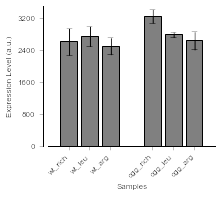

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = range(5,-1,-1)

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, meanSubtractedData['mean'][sampleOrder], align='center' )
ax.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(meanSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_unnormalizedexpression_24h.svg')

#### Rich-normalized Expression ####

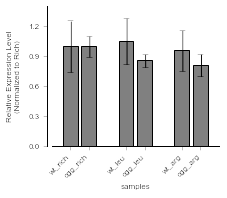

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.labelpad = 15

sampleOrder = numpy.array([5,2,4,1,3,0])

xlocations = numpy.array([0,1,3,4,6,7])

ax.bar(xlocations, meanSubtractedData['normalizedMean'][sampleOrder], align='center' )
ax.errorbar(xlocations, meanSubtractedData['normalizedMean'][sampleOrder], 
            meanSubtractedData['normalizedStd'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(meanSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Relative Expression Level\n(Normalized to Rich)', ha='center')

fig.set_size_inches([3,2.5])
fig.savefig('../../20151002/fcs_files/20151002_psrpilot_talen_0910/processedData/20151002_fc_24h.svg')